<a href="https://colab.research.google.com/github/newbie-cap/EasyPractice4Steganography/blob/main/Easy_Steganography_Encode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving missile.jpg to missile.jpg
Saving monalisa.jpg to monalisa.jpg
cover_b : [[30 40 40 ... 50 40 50]
 [40 30 50 ... 40 40 40]
 [50 40 50 ... 50 50 40]
 ...
 [10 10 10 ...  0  0  0]
 [10 10 10 ...  0  0  0]
 [10 10 10 ...  0  0  0]]
stego_b : [[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 1. 1. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
new_b : [[33. 43. 43. ... 53. 43. 53.]
 [43. 33. 53. ... 43. 43. 43.]
 [53. 43. 53. ... 53. 53. 43.]
 ...
 [12. 12. 12. ...  2.  2.  2.]
 [12. 12. 12. ...  1.  1.  2.]
 [12. 12. 12. ...  2.  2.  2.]]


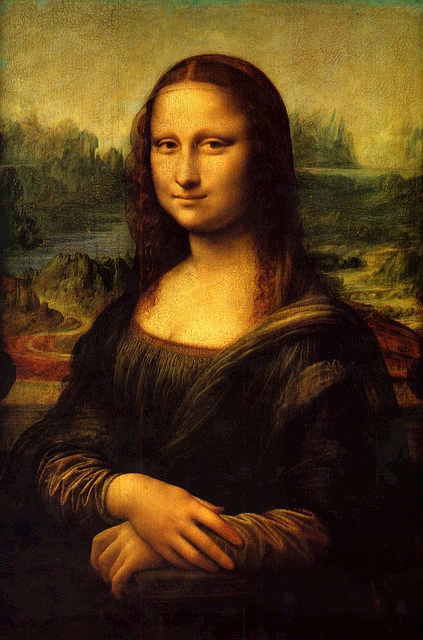

In [1]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# first need to update imgs(cover, stego)
#uploaded = files.upload()
%matplotlib inline



def encode():
  original_cover = cv2.imread("monalisa.jpg")
  original_stego = cv2.imread("missile.jpg")

  # colab use cv2_imshow
  # else use cv2.imshow
  cover = original_cover
  stego = original_stego

  (h,w) = cover.shape[:2]
  stego = cv2.resize(stego, (w, h))

  # bgr 3 channel
  cover_b = cover[:,:,0]
  cover_g = cover[:,:,1]
  cover_r = cover[:,:,2]

  stego_b = stego[:,:,0]
  stego_g = stego[:,:,1]
  stego_r = stego[:,:,2]

  cover_b = (cover_b//10)*10
  cover_g = (cover_g//10)*10
  cover_r = (cover_r//10)*10

  stego_b = np.round(stego_b*(9/255))
  stego_g = np.round(stego_g*(9/255))
  stego_r = np.round(stego_r*(9/255))

  new_b = cover_b + stego_b
  new_g = cover_g + stego_g
  new_r = cover_r + stego_r
  
  final_img = cv2.merge([new_b, new_g, new_r])
  print("cover_b :", cover_b)
  print("stego_b :", stego_b)
  print("new_b :",new_b)
  cv2_imshow(final_img)
  return final_img

if __name__ == '__main__':
  encode()